In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
fname = 'results/20160825-143207-156.txt'
date = fname.split('/')[1].split('.')[0]
print date
data = np.loadtxt(fname)

20160825-143207-156


In [10]:
data.shape

(35, 3)

In [11]:
pix_dist = data[: , 0].ravel()
altitude = data[: , 1].ravel()
alt_err = data[: , 2].ravel()

In [13]:
idx_arr = altitude.argsort(axis=0)

In [16]:
pix_dist = pix_dist[idx_arr]
altitude = altitude[idx_arr]
alt_err = alt_err[idx_arr]

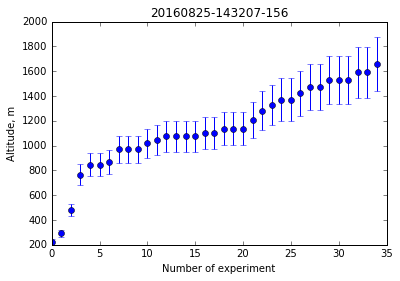

In [35]:
plt.errorbar(range(data.shape[0]), altitude, yerr=alt_err, marker='o', linestyle='None')
plt.title(date)
plt.xlabel('Number of experiment')
plt.ylabel('Altitude, m')